In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
iris = load_iris()

In [3]:
X = iris.data
#Sepal Length (in centimeters)
#Sepal Width (in centimeters)
#Petal Length (in centimeters)
#Petal Width (in centimeters)

y = iris.target
#Iris-setosa
#Iris-versicolor
#Iris-virginica

In [4]:
#decrease the range of the numbers
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
#Sepal-Length #Sepal-Width #Petal-Length #Petal-Width
df = pd.DataFrame(X_scaled, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [6]:
#eps= defines the radius of the neighborhood around a data point
#min_smaples= minimum number of data points that must be within the 'eps' distance to consider a point as a core point
db = DBSCAN(eps=1.4, min_samples=5).fit(X_scaled)
labels_dbscan = db.labels_

In [7]:
 #n_clusters = number of K
kmeans = KMeans(n_clusters=3, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)

In [8]:
# Calculate silhouette scores
silhouette_dbscan = silhouette_score(X_scaled, labels_dbscan)
silhouette_kmeans = silhouette_score(X_scaled, labels_kmeans)
print(f"Silhouette Score (DBScan): {silhouette_dbscan:.2f}")
print(f"Silhouette Score (K-means): {silhouette_kmeans:.2f}")

Silhouette Score (DBScan): 0.58
Silhouette Score (K-means): 0.46


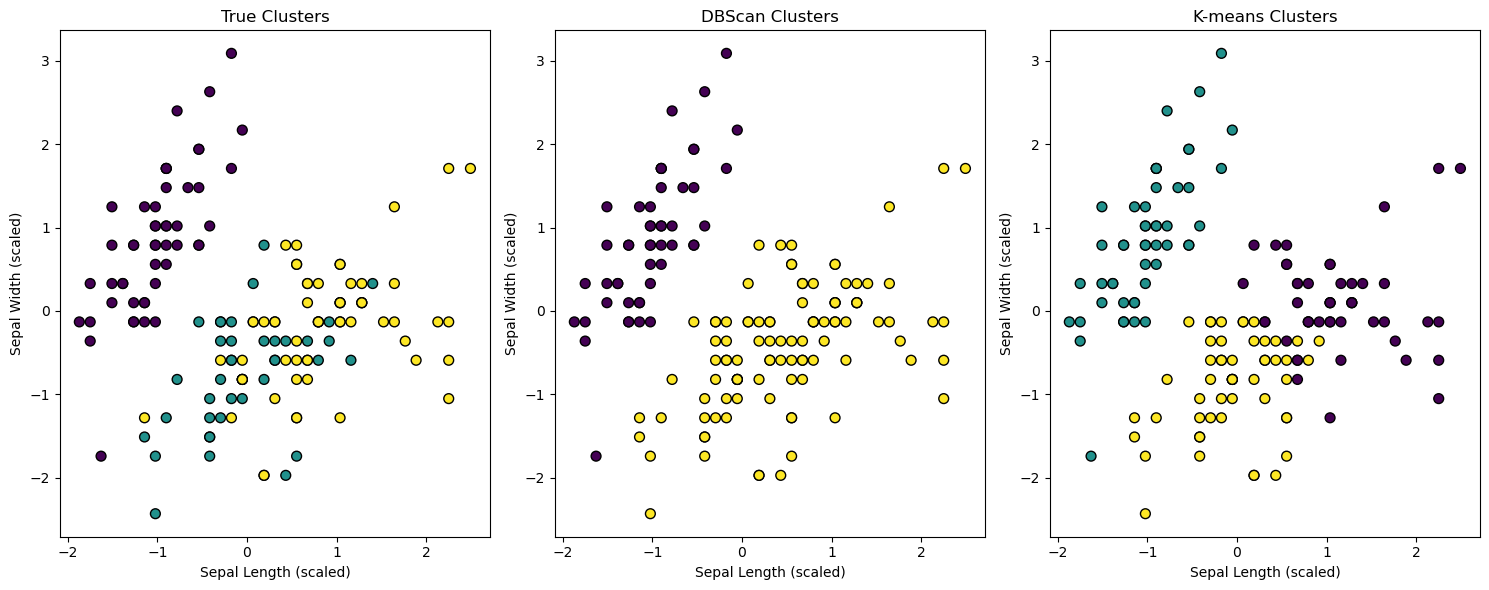

In [9]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title("True Clusters")
plt.xlabel("Sepal Length (scaled)")
plt.ylabel("Sepal Width (scaled)")

plt.subplot(1, 3, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_dbscan, cmap='viridis', edgecolor='k', s=50)
plt.title("DBScan Clusters")
plt.xlabel("Sepal Length (scaled)")
plt.ylabel("Sepal Width (scaled)")

plt.subplot(1, 3, 3)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_kmeans, cmap='viridis', edgecolor='k', s=50)
plt.title("K-means Clusters")
plt.xlabel("Sepal Length (scaled)")
plt.ylabel("Sepal Width (scaled)")

plt.tight_layout()
plt.show()